In [10]:
from selenium import webdriver
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from selenium.webdriver.common.keys import Keys
import time
import lxml
from pandas import DataFrame as df
from selenium.webdriver.chrome.service import Service as ChromeService
from webdriver_manager.chrome import ChromeDriverManager
import pyvis
from linkedin import linkedin
import warnings
import random
import requests
warnings.filterwarnings("ignore")
import chromedriver_binary


ModuleNotFoundError: No module named 'chromedriver_binary'

In [ ]:
#use google to scrape ! viola
# all you need is links

In [4]:
import scipy.interpolate as si

# Curve base:
points = [[0, 0], [0, 2], [2, 3], [4, 0], [6, 3], [8, 2], [8, 0]];
points = np.array(points)

x = points[:,0]
y = points[:,1]


t = range(len(points))
ipl_t = np.linspace(0.0, len(points) - 1, 100)

x_tup = si.splrep(t, x, k=3)
y_tup = si.splrep(t, y, k=3)

x_list = list(x_tup)
xl = x.tolist()
x_list[1] = xl + [0.0, 0.0, 0.0, 0.0]

y_list = list(y_tup)
yl = y.tolist()
y_list[1] = yl + [0.0, 0.0, 0.0, 0.0]

x_i = si.splev(ipl_t, x_list) # x interpolate values
y_i = si.splev(ipl_t, y_list) # y interpolate values

In [13]:
def linkedin_scraper(company, scroll_time, profile_url):

    driver = webdriver.Chrome('./chromedriver')
    time.sleep(5)
    driver.maximize_window()
    time.sleep(5)
    driver.get("https://www.linkedin.com/")
    time.sleep(5)

    cookies_dict = {}
    for cookie in driver.get_cookies():
            cookies_dict[cookie['name']] = cookie['value']
            
    driver.close()

    resp = requests.get("https://www.linkedin.com/company/twitter",
                     cookies=cookies_dict,
                     headers={'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/87.0.4280.88 Safari/537.36',
                              'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3',
                                                   'accept-encoding': 'gzip, deflate, br',
                                                   'accept-language': 'en-US,en;q=0.9',
                                                   'upgrade-insecure-requests': '1',
                                                   'scheme': 'https'})
        
    html = resp.text


    all_role=[]
    #i = 0
    for url in profile_url:
    #    i = i + 1
        #driver.get(url)

    #    if i%100 == 0:
    #        time.sleep(random.choice((np.arange(120,140))))
    #    if i%50 == 0:
    #        time.sleep(random.choice((np.arange(60,80))))
    #    else:

    #    time.sleep(random.choice((np.arange(30,60)))) 

            #scroll for given duration
    #    scroll_time = random.choice((np.arange(10,20)))
    #    start = time.time()

        # will be used in the while loop
    #    initialScroll = 0
    #    finalScroll = 1000

    #    while True:
    #        driver.execute_script(f"window.scrollTo({initialScroll}, {finalScroll})")
            # this command scrolls the window starting from
            # the pixel value stored in the initialScroll 
            # variable to the pixel value stored at the
            # finalScroll variable
    #        initialScroll = finalScroll
    #        finalScroll += 1000

            # we will stop the script for 3 seconds so that 
            # the data can load
    #        time.sleep(3)
            # You can change it as per your needs and internet speed

    #        end = time.time()

            # We will scroll for 20 seconds.
            # You can change it as per your needs and internet speed
    #        if round(end - start) > scroll_time:
    #            break  
        

        src = requests.get(url)
        soup = src.text

        # Now using beautiful soup
        #soup = BeautifulSoup(src, 'lxml')

        #include 'mr1 hoverable-link-text t-bold'

        #sustainability related roles
        #proper_roles_html = soup.find(
        #'div', {'class':'display-flex align-items-center'}) #check

        proper_roles_html = soup.find_all(
        'section', {'class':'artdeco-card ember-view relative break-words pb3 mt2'})

        # proper_roles_html = soup.find('h2', {'class':'pvs-header__title text-heading-large'})
        p_role = []
        for el in proper_roles_html:
            val = el.find('h2').text.strip()
            if val == 'ExperienceExperience':
                exp = el.find('div', {'class':['display-flex flex-column full-width align-self-center']})
                exp = exp.find_all('span', {"class":["mr1 t-bold", 'mr1 hoverable-link-text t-bold']})
                if len(exp) > 1:
                    p_role = exp[1]
                    p_role = p_role.find('span', {"class":["visually-hidden"]})
                else:
                    p_role = exp[0]
                    p_role = p_role.find('span', {"class":["visually-hidden"]})

        print(p_role.text.strip())
        all_role.append(p_role.text.strip())
            #role = role_scraper(url)
            #print(role)
            #all_role.append(role)
    
    sust_df = df({'role':all_role})
    #names_df = df({'name':sustainability_names})
    sust_df['company'] = company

    return(sust_df)
    #return('yes')

<!doctype html><html lang="en-SG"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>linkedin.com/in/arjunkmrm - Google Search</title><script nonce="Xu-vwYWCtQLh1EvV2XgWEQ">(function(){
document.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){
var a=window.performance;window.start=Date.now();a:{var b=window;if(a){var c=a.timing;if(c){var d=c.navigationStart,f=c.responseStart;if(f>d&&f<=window.start){window.start=f;b.wsrt=f-d;break a}}a.now&&(b.wsrt=Math.floor(a.now()))}}window.google=
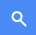

In [26]:

resp = requests.get("https://www.google.com/search?q=linkedin.com%2Fin%2Farjunkmrm&sxsrf=ALiCzsac7iE_KVWIHSznmyufg6lb4ddRww%3A1664865252912&ei=5NM7Y8ymN_6C3LUPkL-EuA8&ved=0ahUKEwjMqP6v-sX6AhV-AbcAHZAfAfcQ4dUDCA4&uact=5&oq=linkedin.com%2Fin%2Fvalliammai-pichappan&gs_lcp=Cgdnd3Mtd2l6EANKBAhBGAFKBAhGGABQtQNYmRFgxBJoAXAAeACAAUGIAeoDkgECMTCYAQCgAQHAAQE&sclient=gws-wiz")
    
print(resp.text)

In [28]:
import requests

r = requests.post(url = 'https://async.scraperapi.com/jobs', json={ 'apiKey': '2b2731850cd22d5b0fdca448b908d8bd', 'url': 'https://www.linkedin.com/in/arjunkmrm' })
print(r.text)

{"id":"72b826ef-b8b5-4518-9300-efb63c832b41","status":"running","statusUrl":"https://async.scraperapi.com/jobs/72b826ef-b8b5-4518-9300-efb63c832b41","url":"https://www.linkedin.com/in/arjunkmrm"}


In [33]:
r.text[3]

'd'

In [25]:
#r = requests.get(url = 'https://async.scraperapi.com/jobs/4da2e2e2-7f7d-4ff3-a29d-f55e34b797de')
#print(r.text)

In [17]:
HtmlPath = "./pages/twitter.html"
page_fun = open(HtmlPath,'w',encoding='utf-8')
page_fun.write(html)
page_fun.close()

In [18]:
page_fun

<_io.TextIOWrapper name='./pages/twitter.html' mode='w' encoding='utf-8'>

In [12]:

##src = requests.get("https://www.geeksforgeeks.org/implementing-web-scraping-python-beautiful-soup/")
#src = page.page_source

# Now using beautiful soup
#print(src.text)


In [62]:
#get profile link from url
def get_profile_url(company, scroll_time):

    driver = webdriver.Chrome('./chromedriver')
    time.sleep(4)
    #sign in to your profile
    driver.get('https://www.linkedin.com/checkpoint/lg/sign-in-another-account')
    # the data can load
    time.sleep(4)

    #find username field
    username = driver.find_element("id", "username")
    # Enter Your Email Address
    username.send_keys("arjunkmrm@icloud.com")  
    # entering password
    pword = driver.find_element("id", "password")
    # Enter Your Password
    pword.send_keys("arjlinZ420713~~")        
    #click login button
    element = driver.find_element("xpath", "//button[@type='submit']")
    action = webdriver.ActionChains(driver)
    action.move_to_element(element)
    action.move_by_offset(10, 20)
    action.perform()
    time.sleep(4)
    element.click()

    #go to target company
    # Opening Kunal's Profile
    # paste the URL of Kunal's profile here
    company_url = "https://www.linkedin.com/company/" + company + "/people/"
    

    #open page
    driver.get(company_url)
    # the data can load
    time.sleep(4)
    
    #filter to sustainability
    filter = driver.find_element("xpath", "//*[@id='people-search-keywords']")
    action = webdriver.ActionChains(driver)
    action.move_to_element(filter)
    action.move_by_offset(10, 20)
    action.perform()
    #id="people-search-keywords"
    filter.send_keys("sustainability")
    time.sleep(4)
    filter.send_keys(Keys.RETURN)
    #scroll for given duration
    #scroll_time = 15
    start = time.time()

    # will be used in the while loop
    initialScroll = 0
    finalScroll = 1000

    while True:
        driver.execute_script(f"window.scrollTo({initialScroll}, {finalScroll})")
        # this command scrolls the window starting from
        # the pixel value stored in the initialScroll 
        # variable to the pixel value stored at the
        # finalScroll variable
        initialScroll = finalScroll
        finalScroll += 1000

        # we will stop the script for 3 seconds so that 
        # the data can load
        time.sleep(3)
        # You can change it as per your needs and internet speed

        end = time.time()

        # We will scroll for 20 seconds.
        # You can change it as per your needs and internet speed
        if round(end - start) > scroll_time:
            break

    src = driver.page_source

    # get the hrefs
    # Now using beautiful soup
    soup = BeautifulSoup(src, 'lxml')

    links_html = soup.find_all('a', {'class':'ember-view link-without-visited-state'})

    user_url = []
    for link in links_html:
        url = link.get('href')
        if url.startswith('/in'):
            user_url.append('https://www.linkedin.com/' + url)

    return(user_url) #returns array of links



In [63]:
#get role given profile link

def role_scraper(profile_url):
    
    driver = webdriver.Chrome('./chromedriver')
    time.sleep(4)
    #driver.set_page_load_timeout(30)
    #sign in to your profile
    driver.get('https://www.linkedin.com/checkpoint/lg/sign-in-another-account')
    time.sleep(4)
    #find username field
    username = driver.find_element("id", "username")
    # Enter Your Email Address
    username.send_keys("arjunkmrm@icloud.com")  
    # entering password
    pword = driver.find_element("id", "password")
    # Enter Your Password
    pword.send_keys("arjlinZ420713~~")        
    #click login button
    element = driver.find_element("xpath", "//button[@type='submit']")
    action = webdriver.ActionChains(driver)
    action.move_to_element(element)
    action.move_by_offset(10, 20)
    action.perform()
    element.click()

 
    # You can change it as per your needs and internet speed
    driver.get(profile_url)
    #B-spline movement
    #for mouse_x, mouse_y in zip(x_i, y_i):
    #    action.move_by_offset(mouse_x,mouse_y)
    #action.perform();  
    # the data can load
    time.sleep(4)
    src = driver.page_source
    
    # Now using beautiful soup
    soup = BeautifulSoup(src, 'lxml')

    #include 'mr1 hoverable-link-text t-bold'

    #sustainability related roles
    #proper_roles_html = soup.find(
    #'div', {'class':'display-flex align-items-center'}) #check

    proper_roles_html = soup.find_all(
    'section', {'class':'artdeco-card ember-view relative break-words pb3 mt2'})

    # proper_roles_html = soup.find('h2', {'class':'pvs-header__title text-heading-large'})
    proper_role = []
    for el in proper_roles_html:
        val = el.find('h2').text.strip()
        if val == 'ExperienceExperience':
            exp = el.find('div', {'class':['display-flex flex-column full-width align-self-center']})
            exp = exp.find_all('span', {"class":["mr1 t-bold", 'mr1 hoverable-link-text t-bold']})
            if len(exp) > 1:
                proper_role = exp[1]
                proper_role = proper_role.find('span', {"class":["visually-hidden"]})
            else:
                proper_role = exp[0]
                proper_role = proper_role.find('span', {"class":["visually-hidden"]})

    return(proper_role.text.strip())

    
    # proper_roles_html = proper_roles_html.find(
    # 'span', {'class':'visually-hidden'})

    #proper_role = proper_roles_html.text.strip()

    # return(proper_roles_html) #returns role at the tope of experience as string


In [66]:
msft_profile_url = get_profile_url('microsoft', 180)


In [8]:
msft_profile_url

NameError: name 'msft_profile_url' is not defined

In [72]:
msft = linkedin_scraper('microsoft', 180, msft_profile_url) #scrape multiple roles within a division

Asia Datacenter Sustainability Policy Lead
Director - Energy (APAC) - DC Energy and Sustainability
Manufacturing Program Lead
Director, Energy and Sustainability, Asia
Partnership Lead (ISVs / Technology Partners)
Connected Customer Experience Asia (Asia-Pacific) Engagement Leader
Senior Manager, Regional Sustainability
Director, Energy & Resources, Asia
Corporate Vice President, Sustainability
Sustainability Program Manager
Sustainability Lead, Cloud Supply Chain Sustainability
Global Sustainability Specialist
Energy Program Manager, APAC
Global Sustainability Specialist
Chief Of Staff, Sustainability
Chief Sustainability Officer
Global Lead | Edge Solutions 5G/IoT/AI/Sustainability
Sustainability Industry Advocate
Cloud Acquisition Lead, Corporate Business, APAC
Global Sustainability Specialist
Sustainability Service Line Lead - APJ
Director Sustainability Policy - European Government Affairs
Manager - Supply Chain Environmental Sustainability
Sustainability Field Engagement and Cust

AttributeError: 'list' object has no attribute 'text'

In [58]:
msft

NameError: name 'msft' is not defined

In [ ]:
msft = linkedin_scraper('microsoft', 'sustainability', 180)
meta = linkedin_scraper('meta', 'sustainability', 180)
goog = linkedin_scraper('google', 'sustainability', 180)
appl = linkedin_scraper('apple', 'sustainability', 180)
amzn = linkedin_scraper('amazon', 'sustainability', 180)

troles_df = df()
troles_df = pd.concat([msft, meta, goog, appl, amzn])
troles_df



,name,role,company
0,Kavickumar Muruganathan,Sustainability | ESG | Technology,microsoft
1,Benson Ang,Digital Transformation | Operational Excellenc...,microsoft
2,Leo Wirawan,Energy and Sustainability,microsoft
3,Srikant Kadambi,"Managing Director, Energy & Sustainability, As...",microsoft
4,Jim Bullock,Energy and Sustainability at Microsoft,microsoft
...,...,...,...
559,Céline Hasboun,Marketing Manager and Sustainability Ambassado...,amazon
560,Sukhmeet Singh,"Manager II, Amazon Robotics | DEI | Corporate ...",amazon
561,"Bella Nguyen, PhD","Sustainable Buildings, Amazon Transportation S...",amazon
562,Archit Koti,BEV | FCEV | Sustainability | ZEV Strategy,amazon


In [ ]:
#compression_opts = dict(method='zip', archive_name='roles.csv')
troles_df.to_csv('tech_roles.csv', index=False)

In [ ]:
dbs = linkedin_scraper('dbs-bank', 'sustainability', 180)
dbs.head()

/var/folders/b3/24md510n3w73jblqrzpnbzh80000gn/T/ipykernel_7022/1117600116.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')


,name,role,company
0,"Helge Muenkel, CFA",Group Chief Sustainability Officer,dbs-bank
1,Gwenyth Ee,Sustainability | Social impact,dbs-bank
2,Lee Zhenyi,Sustainability & Energy Management,dbs-bank
3,Yulanda C.,Head of Sustainability at DBS Bank,dbs-bank
4,Chong Hau Pang,Sustainability in Supply Chain,dbs-bank


In [ ]:
scb = linkedin_scraper('standardchartered', 'sustainability', 180)
bnpp = linkedin_scraper('bnp-paribas', 'sustainability', 180)
citi = linkedin_scraper('citi', 'sustainability', 180)
hsbc = linkedin_scraper('hsbc', 'sustainability', 180)
jpm = linkedin_scraper('jpmorgan', 'sustainability', 180)

broles_df = df()
broles_df = pd.concat([scb, bnpp, citi, hsbc, jpm])
broles_df


[WDM] - Downloading: 100%|██████████| 7.46M/7.46M [00:00<00:00, 17.9MB/s]


,name,role,company
0,Zhi Ling Wong,"Head, Reputational & Sustainability Risk Frame...",standardchartered
1,Rahul Prem,Program Manager | Financial Markets | Sustaina...,standardchartered
2,"Alyssa Lin, CESGA",Make the world a better place.,standardchartered
3,Glenn Ho 何伟良,Sustainable Finance I Climate Risk Management ...,standardchartered
4,Faisal Abdul Karim,Innovation leader in Banking | FinTech | Risk ...,standardchartered
...,...,...,...
137,Jane Bai,Mechanical Engineering and Economics Student a...,jpmorgan
138,LinkedIn Member,Lead Tableau and Alteryx developer with extens...,jpmorgan
139,Marcos Abud,Sr. Implementation Manager at J.P. Morgan,jpmorgan
140,Kate Liu,Software Engineer,jpmorgan


In [ ]:
#compression_opts = dict(method='zip', archive_name='roles.csv')
broles_df.to_csv('bank_roles.csv', index=False)

In [ ]:
dbs.to_csv('dbs_roles.csv', index=False)

In [ ]:
    driver = webdriver.Chrome('./chromedriver')
    
    #sign in to your profile
    driver.get('https://www.linkedin.com/uas/login?session_redirect=https%3A%2F%2Fwww%2Elinkedin%2Ecom%2Ffeed%2F&fromSignIn=true&trk=cold_join_sign_in')
    #find username field
    username = driver.find_element("id", "username")
    # Enter Your Email Address
    username.send_keys("arjunkmrm@gmail.com")  
    # entering password
    pword = driver.find_element("id", "password")
    # Enter Your Password
    pword.send_keys("arjlinZ420713~~")        
    #click login button
    driver.find_element("xpath", "//button[@type='submit']").click()
    
    #go to target company
    # Opening Kunal's Profile
    # paste the URL of Kunal's profile here
    profile_url = "https://www.linkedin.com/company/" + company + "/people/"
    
    driver.get(profile_url)        # this will open the link

    filter = driver.find_element("xpath", "//*[@id='people-search-keywords']")
    #id="people-search-keywords"
    filter.send_keys("sustainability")
    filter.send_keys(Keys.RETURN)

    start = time.time()
  
    # will be used in the while loop
    initialScroll = 0
    finalScroll = 1000
    
    while True:
        driver.execute_script(f"window.scrollTo({initialScroll}, {finalScroll})")
        # this command scrolls the window starting from
        # the pixel value stored in the initialScroll 
        # variable to the pixel value stored at the
        # finalScroll variable
        initialScroll = finalScroll
        finalScroll += 1000
    
        # we will stop the script for 3 seconds so that 
        # the data can load
        time.sleep(3)
        # You can change it as per your needs and internet speed
    
        end = time.time()
    
        # We will scroll for 20 seconds.
        # You can change it as per your needs and internet speed
        if round(end - start) > scroll_time:
            break
        
    src = driver.page_source
  
    # Now using beautiful soup
    soup = BeautifulSoup(src, 'lxml')

        #sustainability related roles
    #sustainability_roles_html = soup.find_all(
    #'div', {'class': 'artdeco-entity-lockup__subtitle ember-view'})
    #sustainability_roles = []

    #names
    #sustainability_names_html = soup.find_all(
    #'div', {'class': ['artdeco-entity-lockup__title ember-view']})
    #sustainability_names = []
    
    #for role in sustainability_roles_html:
    #    sustainability_roles.append(role.text.strip())

    #for name in sustainability_names_html:
    #    sustainability_names.append(name.text.strip())

    #del sustainability_names[0]
        #find links to their profiles



In [ ]:
 driver = webdriver.Chrome('./chromedriver')

    #sign in to your profile
    driver.get('https://www.linkedin.com/uas/login?session_redirect=https%3A%2F%2Fwww%2Elinkedin%2Ecom%2Ffeed%2F&fromSignIn=true&trk=cold_join_sign_in')
    #find username field
    username = driver.find_element("id", "username")
    # Enter Your Email Address
    username.send_keys("arjunkmrm@gmail.com")  
    # entering password
    pword = driver.find_element("id", "password")
    # Enter Your Password
    pword.send_keys("arjlinZ420713~~")        
    #click login button
    driver.find_element("xpath", "//button[@type='submit']").click()

    #go to target company
    # Opening Kunal's Profile
    # paste the URL of Kunal's profile here
    #profile_url = "https://www.linkedin.com/in/helge-muenkel-cfa-a643bb7/"


In [ ]:
def linkedin_scraper(company, scroll_time, profile_url):

    #use only beautiful soup after getting links
   
    #profile_url = get_profile_url(company, scroll_time)


    driver = webdriver.Chrome('./chromedriver')
    #sign in to your profile
    driver.get('https://www.linkedin.com/checkpoint/lg/sign-in-another-account')
    # the data can load
    time.sleep(4)

    #find username field
    username = driver.find_element("id", "username")
    #element = driver.find_element("xpath", "//button[@type='submit']")
    action = webdriver.ActionChains(driver)
    action.move_to_element(username)
    action.move_by_offset(10, 20)
    action.perform()
    time.sleep(random.choice((np.arange(3,7))))
    # Enter Your Email Address
    username.send_keys("billybutcherlenny@yahoo.com")  

    # entering password
    pword = driver.find_element("id", "password")
    #element = driver.find_element("xpath", "//button[@type='submit']")
    action = webdriver.ActionChains(driver)
    action.move_to_element(pword)
    action.move_by_offset(10, 20)
    action.perform()
    time.sleep(random.choice((np.arange(3,7))))
    # Enter Your Password
    pword.send_keys("arjlinZ420713~~")   

    #click login button
    element = driver.find_element("xpath", "//button[@type='submit']")
    action = webdriver.ActionChains(driver)
    action.move_to_element(element)
    action.move_by_offset(10, 20)
    action.perform()
    time.sleep(random.choice((np.arange(3,7))))
    element.click()

    #print(profile_url)

    all_role=[]
    #i = 0
    for url in profile_url:
    #    i = i + 1
        #driver.get(url)

    #    if i%100 == 0:
    #        time.sleep(random.choice((np.arange(120,140))))
    #    if i%50 == 0:
    #        time.sleep(random.choice((np.arange(60,80))))
    #    else:

    #    time.sleep(random.choice((np.arange(30,60)))) 

            #scroll for given duration
    #    scroll_time = random.choice((np.arange(10,20)))
    #    start = time.time()

        # will be used in the while loop
    #    initialScroll = 0
    #    finalScroll = 1000

    #    while True:
    #        driver.execute_script(f"window.scrollTo({initialScroll}, {finalScroll})")
            # this command scrolls the window starting from
            # the pixel value stored in the initialScroll 
            # variable to the pixel value stored at the
            # finalScroll variable
    #        initialScroll = finalScroll
    #        finalScroll += 1000

            # we will stop the script for 3 seconds so that 
            # the data can load
    #        time.sleep(3)
            # You can change it as per your needs and internet speed

    #        end = time.time()

            # We will scroll for 20 seconds.
            # You can change it as per your needs and internet speed
    #        if round(end - start) > scroll_time:
    #            break  
        

        src = requests.get(url)
        soup = src.text

        # Now using beautiful soup
        #soup = BeautifulSoup(src, 'lxml')

        #include 'mr1 hoverable-link-text t-bold'

        #sustainability related roles
        #proper_roles_html = soup.find(
        #'div', {'class':'display-flex align-items-center'}) #check

        proper_roles_html = soup.find_all(
        'section', {'class':'artdeco-card ember-view relative break-words pb3 mt2'})

        # proper_roles_html = soup.find('h2', {'class':'pvs-header__title text-heading-large'})
        p_role = []
        for el in proper_roles_html:
            val = el.find('h2').text.strip()
            if val == 'ExperienceExperience':
                exp = el.find('div', {'class':['display-flex flex-column full-width align-self-center']})
                exp = exp.find_all('span', {"class":["mr1 t-bold", 'mr1 hoverable-link-text t-bold']})
                if len(exp) > 1:
                    p_role = exp[1]
                    p_role = p_role.find('span', {"class":["visually-hidden"]})
                else:
                    p_role = exp[0]
                    p_role = p_role.find('span', {"class":["visually-hidden"]})

        print(p_role.text.strip())
        all_role.append(p_role.text.strip())
            #role = role_scraper(url)
            #print(role)
            #all_role.append(role)
    
    sust_df = df({'role':all_role})
    #names_df = df({'name':sustainability_names})
    sust_df['company'] = company

    return(sust_df)
    #return('yes')